In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
data_file = 'star_classification.csv'
df = pd.read_csv(data_file)

In [50]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [27]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [28]:
value = df['class'].value_counts()

In [29]:
name = df['class'].unique()

<BarContainer object of 3 artists>

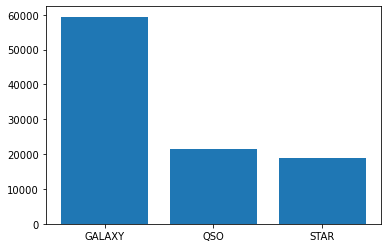

In [30]:
plt.bar(name, value)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

The dataset seems to be pretty clear and we do not have to deal with null values

In [32]:
X = df.drop(['class','obj_ID'], axis = 1)
Y = df['class']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [35]:
X_train.shape

(80000, 16)

In [36]:
X_test.shape

(20000, 16)

#### Trying various classification algorithms

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [38]:
model.fit(X_train, y_train)

/home/amnesiac/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
model.score(X_test, y_test)

0.94

In [40]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [41]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
clf.score(X_test, y_test)

0.9628

#### That is an amazing accruacy boost

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()

In [71]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [72]:
rf_clf.score(X_test, y_test)

0.97745

In [46]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')

In [47]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [48]:
classifier.score(X_test, y_test)

0.9453

#### So random forest seems to be a better classifier. Now lets see its accuracy with confusion matrix.

In [59]:
y_predicted = rf_clf.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[11694,   119,    47],
       [  272,  3524,     1],
       [    2,     0,  4341]])

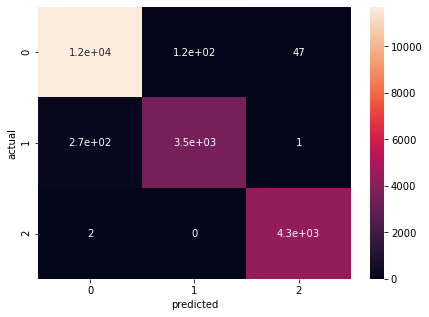

In [69]:
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

#### Lets try fine tuning the model paramenter mainly 'n_estimators'

In [75]:
for i in range(10, 100, 10):
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))
    

0.9761
0.9771
0.97725
0.9773
0.97715
0.97665
0.97735
0.97755
0.9774


#### Looking at the accuracy of the model, it does not seem to chance much. Still it performs best when n_estimators = 40
Lets train the model again using 90% of the data with n_estimators=40 and see its accuracy

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
model = RandomForestClassifier(n_estimators=40)
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.97835